## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Background:

The real estate agency aims to provide accurate property valuations to homeowners looking to sell their homes and 
to buyers interested in purchasing properties. Property valuation is a critical aspect of real estate transactions as 
it directly impacts pricing decisions, marketing strategies, and negotiation outcomes.



### Business Problem Statement: 

The real estate agency faces challenges in accurately valuing properties, which can lead to overpricing or underpricing homes,
affecting client satisfaction, time on market, and overall business performance

<strong>OBJECTIVES:

1.Determine the key factors such as square foot living,the number of bedrooms and bathrooms,the condition of the house and others that significantly influence the house prices.


2.Develop a model that can accurately predict house prices based on these factors.


3.To determine which seasons have the highest sales.

4.To provide valuable insights for real estate agents, property developers, and investors in the company’s portfolio to make informed decisions regarding pricing, renovations, and marketing strategies

<strong>Hypothesis Testing

1.How do structural characteristics,location and others such as view and grading all work together to affect a house's market price, and how may these interactions be best modeled to produce highly accurate housing price predictions?

Ho: There is no statistically significant interaction effect between sqft_living and grading on the price of a house

H1: There is a statistically significant interaction effect between sqft_living and grading on the price of a house. 

Null Hypothesis: Multiple linear regression model accurately predicts the prices. 


Alternative Hypothesis: Multiple linear regression model does not accurately predict the prices.

<strong>Data Understanding

In [76]:
#importing libraries
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings in your script
from pandas.plotting import scatter_matrix
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [77]:
#lets load the data
m = r"C:\Users\hp\Desktop\dsc-phase-2-project-v2-3-main\data\kc_house_data.csv"
df = pd.read_csv(m)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [80]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
156,6388930390,11/20/2014,650000.0,5,3.5,3960,25245,2.0,NO,NONE,...,9 Better,2500,1460.0,1996,0.0,98056,47.525,-122.172,2640,13675


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our dataset has 21597 rows and 21 columns. There are null values on the waterfront, yr_renovated columns. Data types in the data set include floats, integers and objects

In [82]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


This gives a summary of the distribution of the numeric data. From the count, we can see which columns have numeric data. Outliers can also be detected using the maximum and minimum values.

<strong>DATA CLEANING

In [83]:
#lets make a copy of the dataset first
df1 = df.copy()
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The id columns seems not to be important, drop. Capitalise the column headings. Change the date format to dd/mm/yy. Put comas on the prices. Look at the data types, make sure they are correct.

i) Handling Missing Values

In [84]:
#handling missing values.
#Lets first identify if we have null values
df1.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [85]:
df1.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [86]:
df1['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [87]:
#we have noticed that our data set has a ? on the column sqft_basement.lets convert into a null value
df1.replace('?', pd.NA, inplace=True)

The null values appear on the waterfront,view and yr_renovated columns. The percentages are small with the highest percentage being 17%. The percentage in View was small,hence dropped.The column waterfront missing values was replaced with NONE.The column yr_renovated missing values was replaced with mode(0)

In [88]:
#Drop missing values in the column View
df1 = df1.dropna(subset=['view', 'sqft_basement'],axis=0)
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [89]:
df1.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [90]:
# Replacing null values with NONE
df1['waterfront'].fillna('NONE', inplace=True)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [91]:
df1.shape

(21082, 21)

In [92]:
mode_year = df1['yr_renovated'].mode()[0]

In [93]:
#Replace the null values in yr_renovated column with the most repeated year 
df1.fillna(mode_year,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21082 non-null  object 
 11  grade          21082 non-null  object 
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  object 
 14  yr_built       21082 non-null  int64  
 15  yr_renovated   21082 non-null  float64
 16  zipcode        21082 non-null  int64  
 17  lat            21082 non-null  float64
 18  long  

Our Dataset has 21 columns, 21534 rows and no missing values.

<strong>DROPPING IRRELEVANT VALUES

In [94]:
#dropping the ID column as it seems to be irrelevant
df1 = df1.drop(columns=['id'])
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<strong>DUPLICATED VALUES

In [95]:
df1.duplicated().any

<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21082, dtype: bool>

We dont have any duplicated values

In [96]:
df1.shape

(21082, 20)

<strong>CHANGING THE DATA TYPES

In [97]:
#The floors and yr_renovated data types need to be changed.
df1['floors'] = df1['floors'].astype(int)
#df['sqft_basement'] = df['sqft_basement'].astype(int)
df1['yr_renovated'] = df1['yr_renovated'].astype(int)
df1['sqft_basement'] = df1['sqft_basement'].astype(float)

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21082 non-null  object 
 1   price          21082 non-null  float64
 2   bedrooms       21082 non-null  int64  
 3   bathrooms      21082 non-null  float64
 4   sqft_living    21082 non-null  int64  
 5   sqft_lot       21082 non-null  int64  
 6   floors         21082 non-null  int32  
 7   waterfront     21082 non-null  object 
 8   view           21082 non-null  object 
 9   condition      21082 non-null  object 
 10  grade          21082 non-null  object 
 11  sqft_above     21082 non-null  int64  
 12  sqft_basement  21082 non-null  float64
 13  yr_built       21082 non-null  int64  
 14  yr_renovated   21082 non-null  int32  
 15  zipcode        21082 non-null  int64  
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

<strong>OUTLIERS

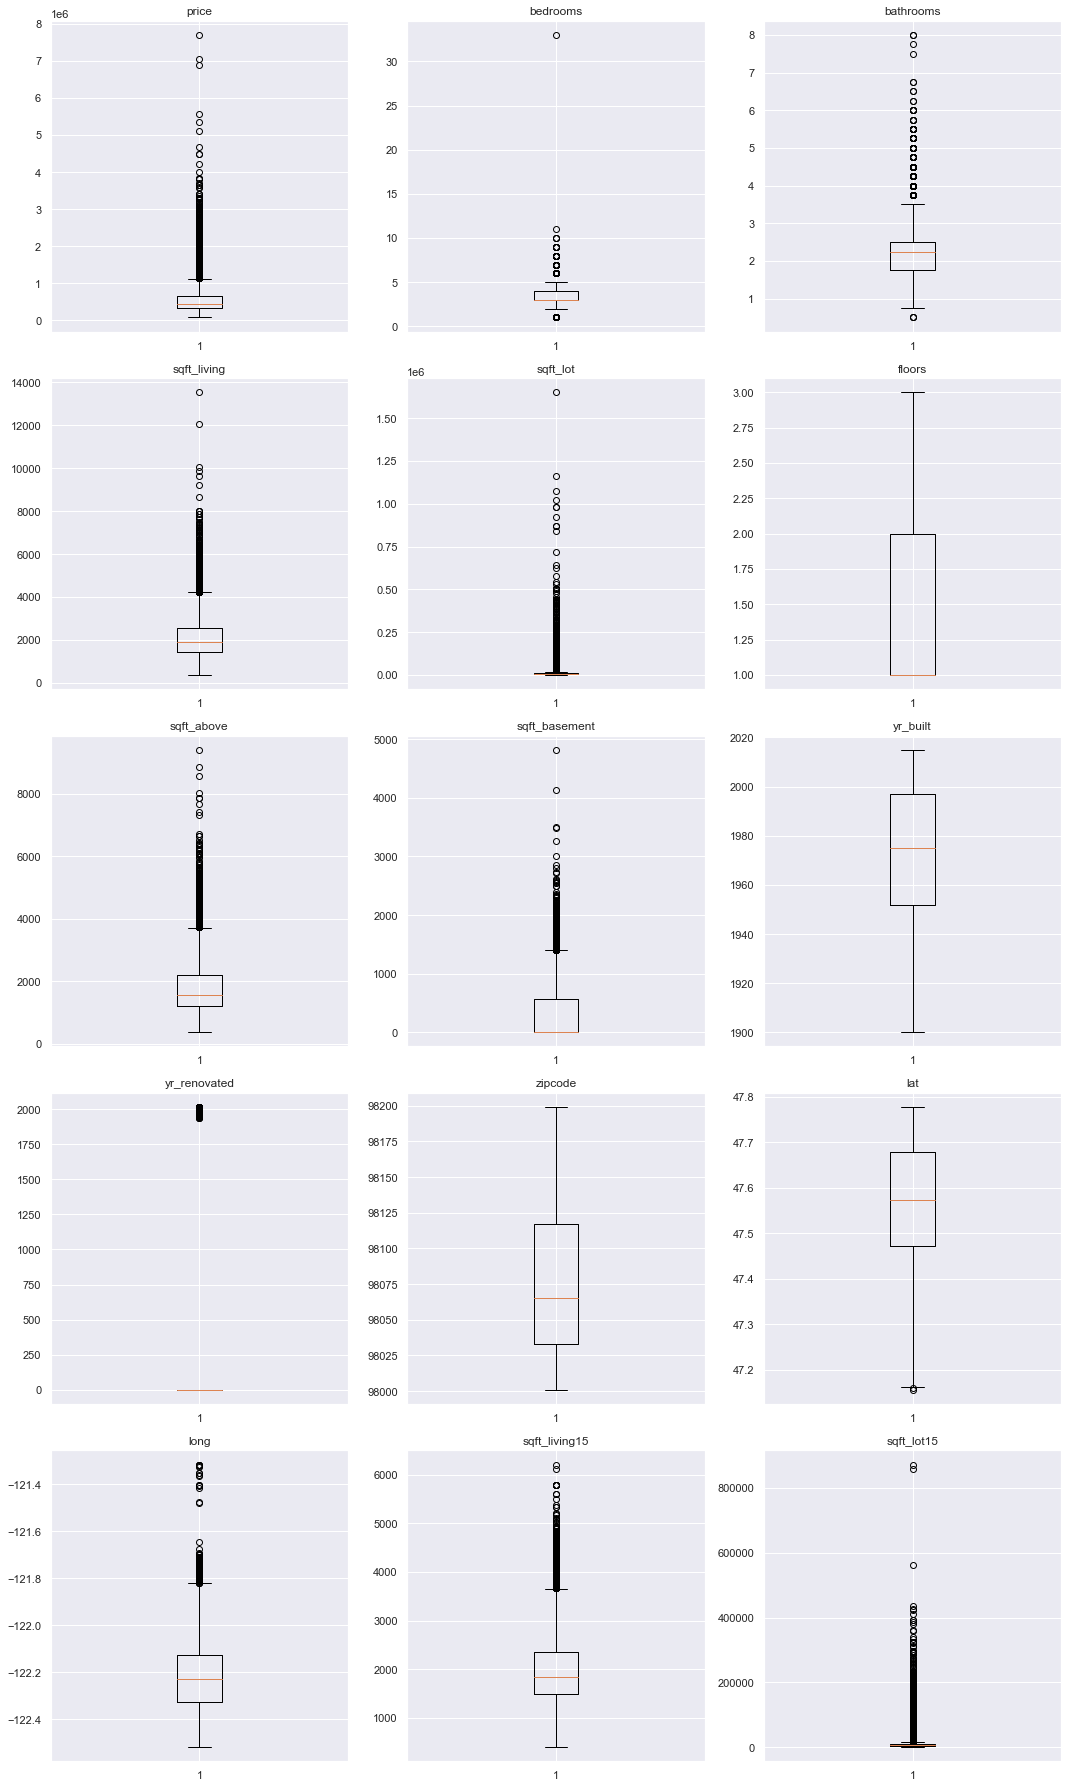

In [99]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

We have noted that we do not have outliers in the floors, yr_built, zipcode and latitude

SKEWNESS AND KURTOSIS

In [28]:
df1.price.skew()

3.9864235583473797

<AxesSubplot:xlabel='price', ylabel='Density'>

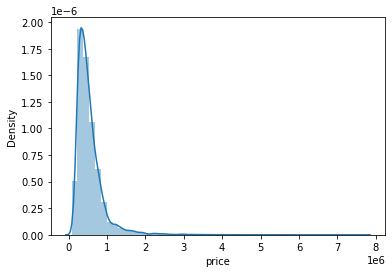

In [29]:
sns.distplot(df1['price'])

A skewness of 4 indicates that the distibution of data in the price column is positively skewed. In regression analysis, highly skewed target variables can violate assumptions of normality and homoscedasticity hence the need to remove outliers

In [30]:
import pandas as pd
from scipy import stats

for column in df1.columns:
    if df1[column].dtype in ['int64', 'float64'] and column not in ['lat', "id", "yr_renovated", "zipcode", 'long']:
        # Calculate skewness including NaN values
        column_skew = stats.skew(df1[column].dropna())
        column_kurtosis = stats.kurtosis(df1[column].dropna())

        print(f"{column}: Skewness = {column_skew}, Kurtosis = {column_kurtosis}")


price: Skewness = 3.9861399157364543, Kurtosis = 34.06048946333713
bedrooms: Skewness = 2.0676579682064817, Kurtosis = 51.30311750509116
bathrooms: Skewness = 0.5159339157923863, Kurtosis = 1.2700320775132043
sqft_living: Skewness = 1.4751290520336788, Kurtosis = 5.285155141668961
sqft_lot: Skewness = 13.109625412685952, Kurtosis = 289.6613994250277
sqft_above: Skewness = 1.4545738313845544, Kurtosis = 3.4493589341150575
sqft_basement: Skewness = 1.5736432185240308, Kurtosis = 2.6985933943644964
yr_built: Skewness = -0.4707948263068775, Kurtosis = -0.6502440458482863
sqft_living15: Skewness = 1.1098692917019588, Kurtosis = 1.604595686027447
sqft_lot15: Skewness = 9.592239187088412, Kurtosis = 154.46697770724586


If the kurtosis value is greater than 3 (positive kurtosis):
The distribution has heavier tails and a sharper peak compared to a normal distribution.
This suggests the presence of more outliers or extreme values in the dataset.


If the kurtosis value is less than 3 (negative kurtosis):
The distribution has lighter tails and is flatter compared to a normal distribution.
This suggests fewer outliers and a more dispersed distribution of data.


Kurtosis values closer to 3 indicate a distribution similar to the normal distribution in terms of tail behavior.

<strong>REMOVING OUTLIERS

Instead of dropping them, we consider replacing them with upper limit and lower limit values using z score method

Z SCORE METHOD

In [31]:
# Columns to check for outliers
columns_to_check = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_above', 'price', 'sqft_lot', 'sqft_above', 'long', 'sqft_living15', 'sqft_lot15']

# Calculate z-scores for selected columns
z_scores = np.abs((df1[columns_to_check] - df1[columns_to_check].mean()) / df1[columns_to_check].std())

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify rows with outliers based on z-scores
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out rows containing outliers 
data_filtered = df1[~outlier_mask]

# Display summary (optional)
print(f"Original DataFrame shape: {df1.shape}")
print(f"Filtered DataFrame shape (after removing outliers): {data_filtered.shape}")

# Optionally, you can assign the filtered DataFrame back to 'data' if needed
data = data_filtered

Original DataFrame shape: (21082, 20)
Filtered DataFrame shape (after removing outliers): (19685, 20)


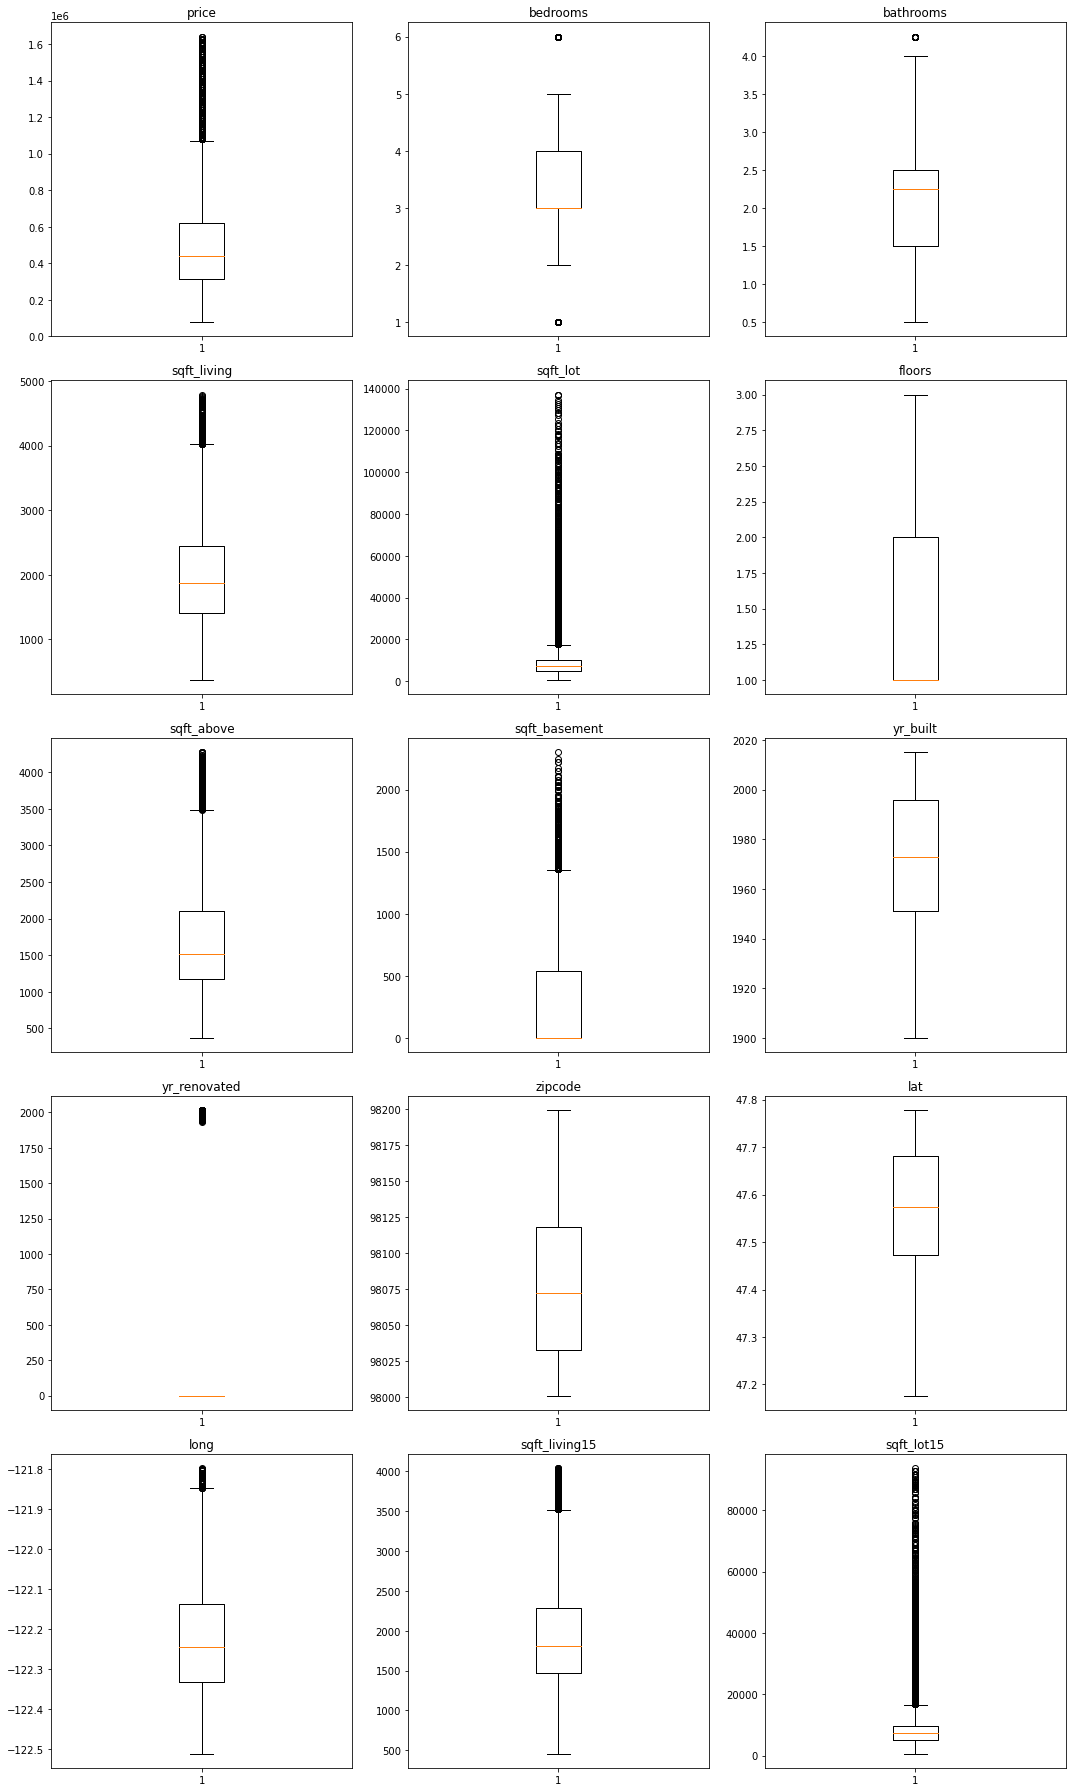

In [32]:
#lets check if the data still has outliers.
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<strong>FEATURE ENGINEERING

In [33]:
#Lets capitalise the column titles.
data.columns = [col.capitalize() for col in data.columns]
data.columns

Index(['Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot',
       'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_above',
       'Sqft_basement', 'Yr_built', 'Yr_renovated', 'Zipcode', 'Lat', 'Long',
       'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

In [34]:
data.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,7 Average,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1,NO,NONE,Average,6 Low Average,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,8 Good,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
#checking for leading & trailing whitespaces and removing them in our datasets
[col.strip() for col in data.columns]

['Date',
 'Price',
 'Bedrooms',
 'Bathrooms',
 'Sqft_living',
 'Sqft_lot',
 'Floors',
 'Waterfront',
 'View',
 'Condition',
 'Grade',
 'Sqft_above',
 'Sqft_basement',
 'Yr_built',
 'Yr_renovated',
 'Zipcode',
 'Lat',
 'Long',
 'Sqft_living15',
 'Sqft_lot15']

In [36]:
# Lets make sure the date column is in dd/mm/yy format
data['Date'] = pd.to_datetime(data['Date'])

# Format the date column to dd/mm/yy format
data['Date'] = data['Date'].dt.strftime('%d/%m/%y')
data.head()


,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,13/10/14,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,7 Average,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,09/12/14,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,25/02/15,180000.0,2,1.00,770,10000,1,NO,NONE,Average,6 Low Average,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,09/12/14,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,18/02/15,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,8 Good,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


Now the date column is in date/month/year format.

### Using the Date Column to come up with a new column called seasons

In [37]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract month to determine the season
data['Month'] = data['Date'].dt.month

# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'

# Apply the function to create the 'seasons' column
data['Seasons'] = data['Month'].apply(get_season)

# Drop the 'Month' column if not needed
data.drop('Month', axis=1, inplace=True)

In [38]:
data.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,...,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Sqft_lot15,Seasons
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,...,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,Fall
1,2014-09-12,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,...,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,Fall
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,...,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,Winter
3,2014-09-12,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,...,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,Fall
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,...,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,Winter


In [39]:
#LETS SPLIT THE  COLUMN GRADE INTO TWO, COLUMN GRADING
data['Grading'] = data["Grade"].str.split().apply(lambda x: x[0])
data

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,...,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Sqft_lot15,Seasons,Grading
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,Fall,7
1,2014-09-12,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,Fall,7
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,Winter,6
3,2014-09-12,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,Fall,7
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,Winter,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3,NO,NONE,Average,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,Spring,8
21593,2015-02-23,400000.0,4,2.50,2310,5813,2,NO,NONE,Average,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,Winter,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2,NO,NONE,Average,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,Summer,7
21595,2015-01-16,400000.0,3,2.50,1600,2388,2,NONE,NONE,Average,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,Winter,8


In [40]:
#lets change the data type of grading into an int
data['Grading'] = data['Grading'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19685 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19685 non-null  datetime64[ns]
 1   Price          19685 non-null  float64       
 2   Bedrooms       19685 non-null  int64         
 3   Bathrooms      19685 non-null  float64       
 4   Sqft_living    19685 non-null  int64         
 5   Sqft_lot       19685 non-null  int64         
 6   Floors         19685 non-null  int32         
 7   Waterfront     19685 non-null  object        
 8   View           19685 non-null  object        
 9   Condition      19685 non-null  object        
 10  Grade          19685 non-null  object        
 11  Sqft_above     19685 non-null  int64         
 12  Sqft_basement  19685 non-null  float64       
 13  Yr_built       19685 non-null  int64         
 14  Yr_renovated   19685 non-null  int32         
 15  Zipcode        1968

ONE HOT ENCODING

In [41]:
#Setting up our feature and target variable
x = data.iloc[:, 2:]  # Selecting features (all columns except the first)
y = data.iloc[:, 1]  # Selecting the target variable (first column)
print(x)
print(y)

       Bedrooms  Bathrooms  Sqft_living  Sqft_lot  Floors Waterfront  View  \
0             3       1.00         1180      5650       1       NONE  NONE   
1             3       2.25         2570      7242       2         NO  NONE   
2             2       1.00          770     10000       1         NO  NONE   
3             4       3.00         1960      5000       1         NO  NONE   
4             3       2.00         1680      8080       1         NO  NONE   
...         ...        ...          ...       ...     ...        ...   ...   
21592         3       2.50         1530      1131       3         NO  NONE   
21593         4       2.50         2310      5813       2         NO  NONE   
21594         2       0.75         1020      1350       2         NO  NONE   
21595         3       2.50         1600      2388       2       NONE  NONE   
21596         2       0.75         1020      1076       2         NO  NONE   

       Condition          Grade  Sqft_above  Sqft_basement  Yr_

In [42]:
#converting the column into categorical columns
house_cond = pd.get_dummies(x['Condition'], drop_first=True, dtype=int)
view_1 = pd.get_dummies(x['View'], drop_first=True, dtype=int)
water_front = pd.get_dummies(x['Waterfront'], drop_first=True, dtype=int)
seasons1 = pd.get_dummies(x['Seasons'], drop_first=True, dtype=int)


In [43]:
#drop the condition, waterfront, View and Grade column
x = x.drop('Condition', axis=1)
x= x.drop('Waterfront', axis=1)
x = x.drop('View', axis=1)
x = x.drop('Grade', axis=1)
x = x.drop('Seasons', axis=1)
print(x)

       Bedrooms  Bathrooms  Sqft_living  Sqft_lot  Floors  Sqft_above  \
0             3       1.00         1180      5650       1        1180   
1             3       2.25         2570      7242       2        2170   
2             2       1.00          770     10000       1         770   
3             4       3.00         1960      5000       1        1050   
4             3       2.00         1680      8080       1        1680   
...         ...        ...          ...       ...     ...         ...   
21592         3       2.50         1530      1131       3        1530   
21593         4       2.50         2310      5813       2        2310   
21594         2       0.75         1020      1350       2        1020   
21595         3       2.50         1600      2388       2        1600   
21596         2       0.75         1020      1076       2        1020   

       Sqft_basement  Yr_built  Yr_renovated  Zipcode      Lat     Long  \
0                0.0      1955             0    

In [44]:
#concertinate our dummy variables to our data
x = pd.concat([data,house_cond, view_1, water_front],axis=1)
x

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,...,Fair,Good,Poor,Very Good,EXCELLENT,FAIR,GOOD,NONE,NONE,YES
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,...,0,0,0,0,0,0,0,1,1,0
1,2014-09-12,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
3,2014-09-12,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,...,0,0,0,1,0,0,0,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2,NO,NONE,Average,...,0,0,0,0,0,0,0,1,0,0
21595,2015-01-16,400000.0,3,2.50,1600,2388,2,NONE,NONE,Average,...,0,0,0,0,0,0,0,1,1,0


In [45]:
print(x.dtypes)

Date             datetime64[ns]
Price                   float64
Bedrooms                  int64
Bathrooms               float64
Sqft_living               int64
Sqft_lot                  int64
Floors                    int32
Waterfront               object
View                     object
Condition                object
Grade                    object
Sqft_above                int64
Sqft_basement           float64
Yr_built                  int64
Yr_renovated              int32
Zipcode                   int64
Lat                     float64
Long                    float64
Sqft_living15             int64
Sqft_lot15                int64
Seasons                  object
Grading                   int32
Fair                      int32
Good                      int32
Poor                      int32
Very Good                 int32
EXCELLENT                 int32
FAIR                      int32
GOOD                      int32
NONE                      int32
NONE                      int32
YES     

<strong> COLINEARITY AND MULTICOLINEARITY

CHECKING FOR COLLINEARITY BETWEEN THE DEPENDENT(PRICE) AND INDEPENDENT VARIABLES

In [46]:
data_corr = data.corr()['Price'].map(abs).sort_values(ascending=False)
data_corr

Price            1.000000
Grading          0.640072
Sqft_living      0.631970
Sqft_living15    0.561656
Sqft_above       0.518802
Bathrooms        0.455976
Lat              0.407917
Bedrooms         0.298772
Sqft_basement    0.276792
Floors           0.231544
Yr_renovated     0.106911
Sqft_lot         0.097231
Sqft_lot15       0.092238
Long             0.034362
Yr_built         0.028031
Zipcode          0.017773
Name: Price, dtype: float64

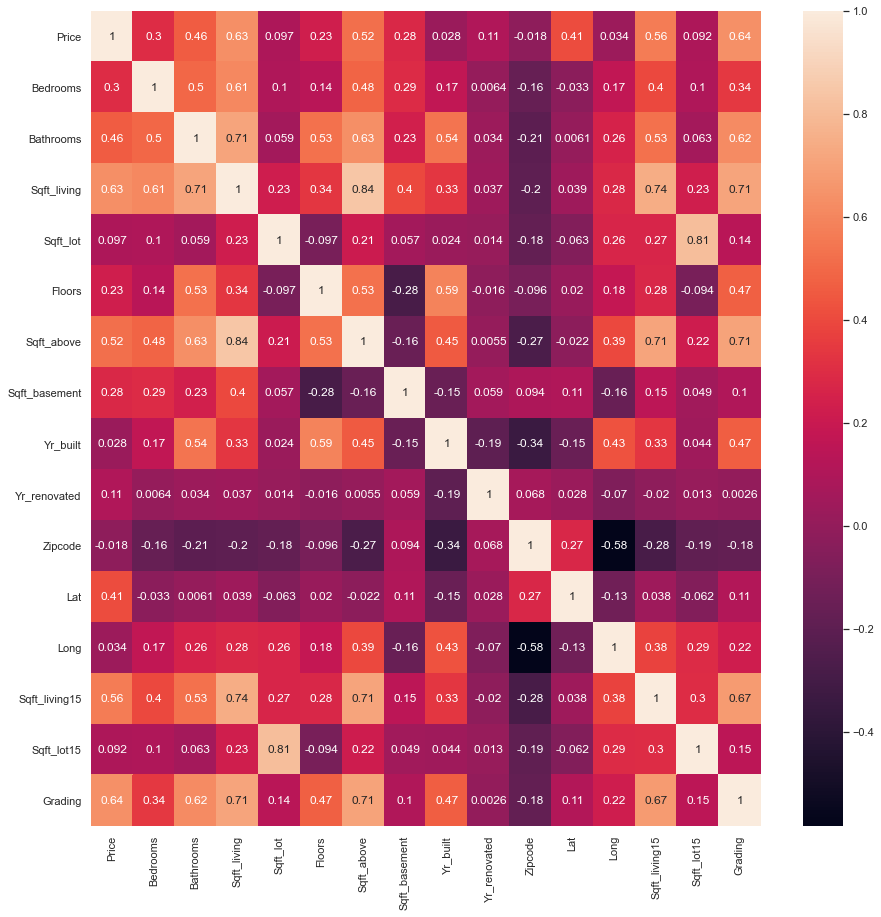

In [47]:
sns.set(rc={'figure.figsize':(15, 15)})
#Use the .heatmap method to depict the relationship visually

sns.heatmap(data.corr(), annot=True, annot_kws={"size": 12})
plt.show()

Step 1: Visualize Relationships Between Features and Target For each feature in the subset, create a scatter plot that shows the feature on the x-axis and SalePrice on the y-axis to identify linear relationships. We will first split our columns into 3 subsets for better visualization.

In [48]:
#Visulaizing linear relationship between features and target variables
data_subset = data[['Sqft_living', 'Sqft_lot', 'Bedrooms', 'Bathrooms','Price']].copy()
data_subset

,Sqft_living,Sqft_lot,Bedrooms,Bathrooms,Price
0,1180,5650,3,1.00,221900.0
1,2570,7242,3,2.25,538000.0
2,770,10000,2,1.00,180000.0
3,1960,5000,4,3.00,604000.0
4,1680,8080,3,2.00,510000.0
...,...,...,...,...,...
21592,1530,1131,3,2.50,360000.0
21593,2310,5813,4,2.50,400000.0
21594,1020,1350,2,0.75,402101.0
21595,1600,2388,3,2.50,400000.0


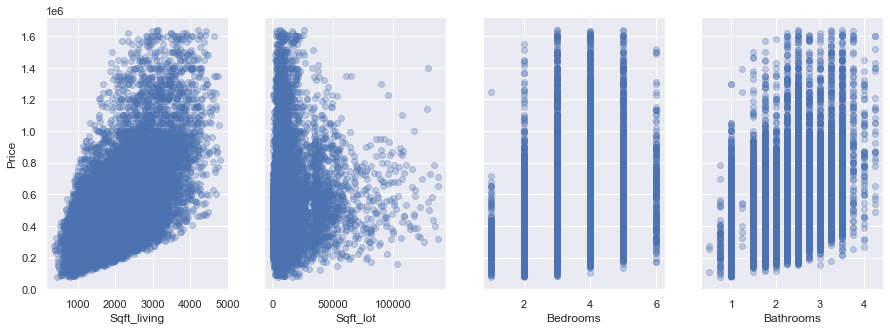

In [49]:
#create scatter plots
fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("Price")

for i, col in enumerate(data_subset.drop("Price", axis=1).columns):
    ax=axes[i]
    ax.scatter(data_subset[col], data_subset["Price"], alpha=0.3)
    ax.set_xlabel(col)

All four features seem to have a linear relationship with Price

Sqft_living seems to have the most variance vs. Price Bedrooms and Bathrooms have very weak variance Vs Price

In [50]:
data_subset2 = data[['Sqft_above', 'Sqft_basement', 'Sqft_living15', 'Sqft_lot15','Price']].copy()
data_subset2

,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Price
0,1180,0.0,1340,5650,221900.0
1,2170,400.0,1690,7639,538000.0
2,770,0.0,2720,8062,180000.0
3,1050,910.0,1360,5000,604000.0
4,1680,0.0,1800,7503,510000.0
...,...,...,...,...,...
21592,1530,0.0,1530,1509,360000.0
21593,2310,0.0,1830,7200,400000.0
21594,1020,0.0,1020,2007,402101.0
21595,1600,0.0,1410,1287,400000.0


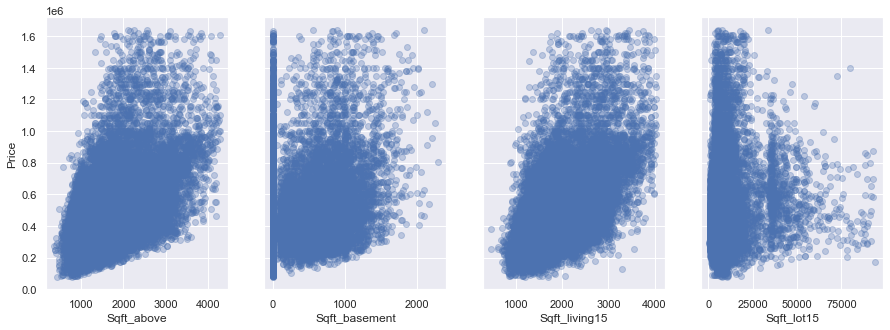

In [51]:
# Your code here - import relevant library, create scatter plots
fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("Price")

for i, col in enumerate(data_subset2.drop("Price", axis=1).columns):
    ax=axes[i]
    ax.scatter(data_subset2[col], data_subset2["Price"], alpha=0.3)
    ax.set_xlabel(col)

All of these four features seem to have a linear relationship with Price

Sqft_living15 column seems to have the most variance vs. Price followed closely by Sqft_lot15

In [52]:
data_subset3 = data[['Lat', 'Floors', 'Zipcode', 'Yr_built', 'Price']].copy()
data_subset3,

(           Lat  Floors  Zipcode  Yr_built     Price
 0      47.5112       1    98178      1955  221900.0
 1      47.7210       2    98125      1951  538000.0
 2      47.7379       1    98028      1933  180000.0
 3      47.5208       1    98136      1965  604000.0
 4      47.6168       1    98074      1987  510000.0
 ...        ...     ...      ...       ...       ...
 21592  47.6993       3    98103      2009  360000.0
 21593  47.5107       2    98146      2014  400000.0
 21594  47.5944       2    98144      2009  402101.0
 21595  47.5345       2    98027      2004  400000.0
 21596  47.5941       2    98144      2008  325000.0
 
 [19685 rows x 5 columns],)

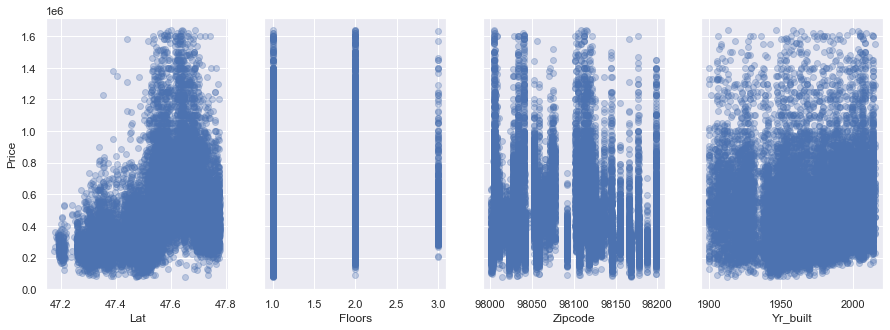

In [53]:
# Your code here - import relevant library, create scatter plots
fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("Price")

for i, col in enumerate(data_subset3.drop("Price", axis=1).columns):
    ax=axes[i]
    ax.scatter(data_subset3[col], data_subset3["Price"], alpha=0.3)
    ax.set_xlabel(col)

All of these four features seem to have a linear relationship with Price

Lat column seems to have the most variance vs. Price

CHECKING FOR MULTICOLLINEARITY

In [54]:
independent_vars = data[['Bathrooms', 'Bedrooms', 'Sqft_living','Grading', 'Sqft_above', 'Sqft_living15', 'Lat', 'Floors', 'Yr_renovated', 'Sqft_lot', 'Sqft_lot15','Long', 'Yr_built', 'Zipcode']]

# Calculate correlation matrix
correlation_matrix = independent_vars.corr()

# Display correlation matrix
print(correlation_matrix)
#2. Variance Inflation Factor (VIF)
#Calculate the Variance Inflation Factor (VIF) for each independent variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(len(independent_vars.columns))]
print(vif_data)

               Bathrooms  Bedrooms  Sqft_living   Grading  Sqft_above  \
Bathrooms       1.000000  0.496519     0.712976  0.621718    0.630923   
Bedrooms        0.496519  1.000000     0.605821  0.341800    0.483000   
Sqft_living     0.712976  0.605821     1.000000  0.714065    0.843143   
Grading         0.621718  0.341800     0.714065  1.000000    0.708186   
Sqft_above      0.630923  0.483000     0.843143  0.708186    1.000000   
Sqft_living15   0.529788  0.395662     0.740939  0.673105    0.710484   
Lat             0.006097 -0.032532     0.038606  0.109614   -0.021854   
Floors          0.526388  0.137811     0.337780  0.470591    0.529241   
Yr_renovated    0.034426  0.006353     0.037267  0.002597    0.005483   
Sqft_lot        0.059252  0.102367     0.225068  0.135724    0.209207   
Sqft_lot15      0.063438  0.102743     0.228282  0.151002    0.217345   
Long            0.257063  0.170344     0.277599  0.221835    0.394315   
Yr_built        0.538480  0.168718     0.334372  0.

High correlations(eg above 0.7 ot 0.8), between pairs of variables suggest potential multicollinearity

If the VIF is greater than 5 or 10,it indicates multicolinearity. Higher VIF values signify stronger correlation with other predictors.

<strong>FEATURE SELECTION

Its a method used to calculate pairwise correlations among features and remove one of each pair of highly correlated features.

In [55]:
# Calculate correlation matrix
correlation_matrix = data.corr().abs()

# Create a mask for selecting upper triangle of correlation matrix
upper_triangle_mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold
highly_correlated_features = [column for column in upper_triangle_mask.columns if any(upper_triangle_mask[column] > 0.8)]
# Drop highly correlated features
selected_features = data.drop(highly_correlated_features, axis=1)
selected_features

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Seasons,Grading
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,7 Average,0.0,1955,0,98178,47.5112,-122.257,1340,Fall,7
1,2014-09-12,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,7 Average,400.0,1951,1991,98125,47.7210,-122.319,1690,Fall,7
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,6 Low Average,0.0,1933,0,98028,47.7379,-122.233,2720,Winter,6
3,2014-09-12,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,7 Average,910.0,1965,0,98136,47.5208,-122.393,1360,Fall,7
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,8 Good,0.0,1987,0,98074,47.6168,-122.045,1800,Winter,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3,NO,NONE,Average,8 Good,0.0,2009,0,98103,47.6993,-122.346,1530,Spring,8
21593,2015-02-23,400000.0,4,2.50,2310,5813,2,NO,NONE,Average,8 Good,0.0,2014,0,98146,47.5107,-122.362,1830,Winter,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2,NO,NONE,Average,7 Average,0.0,2009,0,98144,47.5944,-122.299,1020,Summer,7
21595,2015-01-16,400000.0,3,2.50,1600,2388,2,NONE,NONE,Average,8 Good,0.0,2004,0,98027,47.5345,-122.069,1410,Winter,8


SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [56]:
from sklearn.model_selection import train_test_split
data2 = selected_features
# Set a random seed for reproducibility
np.random.seed(0)

# Split the DataFrame into training and testing datasets
data2_train, data2_test = train_test_split(data2, train_size=0.7, test_size=0.3, random_state=500)

# Display the shapes of the resulting training and testing datasets
print("Shape of data_train:", data2_train.shape)
print("Shape of data_test:", data2_test.shape)

Shape of data_train: (13779, 20)
Shape of data_test: (5906, 20)


In [57]:
data2_train.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Seasons,Grading
20394,2014-10-14,271115.0,2,1.50,830,1325,2,NO,NONE,Average,7 Average,0.0,2005,0,98136,47.5472,-122.384,1310,Fall,7
12871,2014-11-26,1610000.0,4,2.75,4270,25807,2,NO,NONE,Average,11 Excellent,0.0,1996,0,98004,47.5951,-122.206,3860,Fall,11
13963,2015-03-04,800000.0,4,2.25,2120,9921,2,NO,NONE,Average,8 Good,0.0,1981,0,98027,47.5593,-122.082,1890,Spring,8
15214,2015-03-20,715000.0,3,1.75,1650,7276,1,NO,EXCELLENT,Good,7 Average,500.0,1928,0,98117,47.6989,-122.399,2300,Spring,7
20944,2015-04-15,580000.0,3,1.50,1320,1250,3,NO,NONE,Average,8 Good,0.0,2008,0,98103,47.6536,-122.341,1560,Spring,8


<strong>BASELINE MODEL

In [58]:
data2.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_basement,Yr_built,Yr_renovated,Zipcode,Lat,Long,Sqft_living15,Seasons,Grading
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NONE,NONE,Average,7 Average,0.0,1955,0,98178,47.5112,-122.257,1340,Fall,7
1,2014-09-12,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,7 Average,400.0,1951,1991,98125,47.7210,-122.319,1690,Fall,7
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,6 Low Average,0.0,1933,0,98028,47.7379,-122.233,2720,Winter,6
3,2014-09-12,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,7 Average,910.0,1965,0,98136,47.5208,-122.393,1360,Fall,7
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,8 Good,0.0,1987,0,98074,47.6168,-122.045,1800,Winter,8


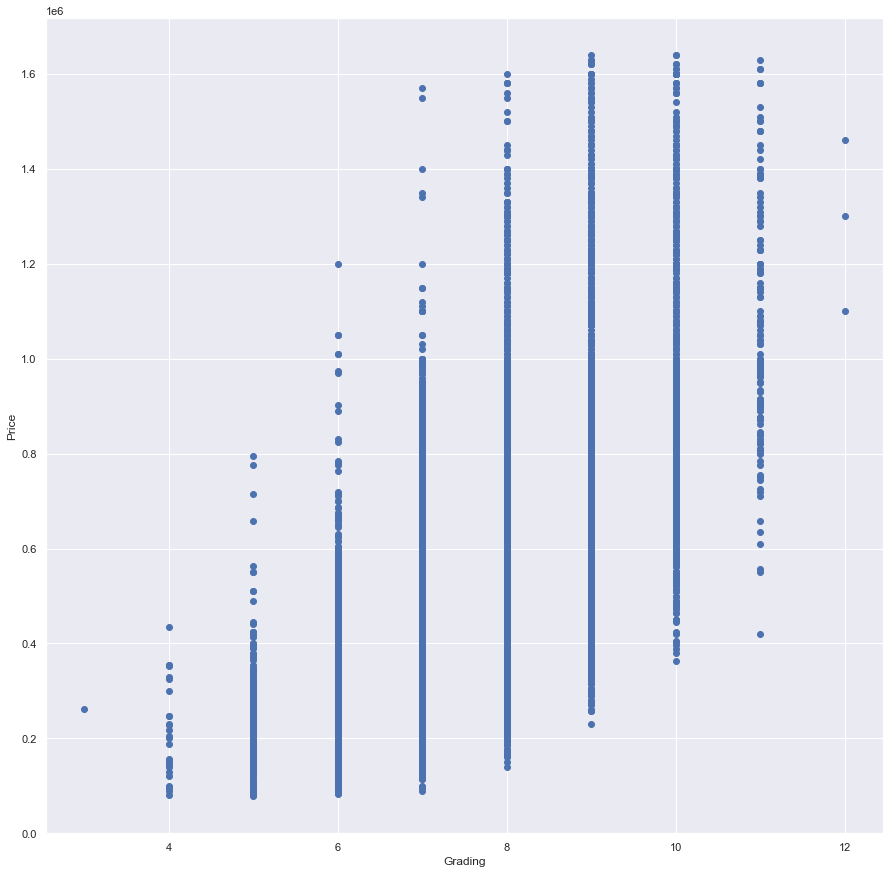

In [59]:
Y = data['Price']
X = data['Grading']
plt.scatter(X,Y)
plt.xlabel("Grading")
plt.ylabel("Price")
plt.show;

In [60]:
X_baseline = data2_train['Grading']  # Predictor variable
y = np.log(data2_train["Price"])  # Log-transformed target variable

# Add a constant term to the predictor variable
X_baseline = sm.add_constant(X_baseline)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X_baseline).fit()

# Display the summary of the fitted model
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     9907.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:51:47   Log-Likelihood:                -5610.7
No. Observations:               13779   AIC:                         1.123e+04
Df Residuals:                   13777   BIC:                         1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7957      0.022    481.624      0.0

Our linear regression model is Price = 0.2923 * Grading + 10.7957.


With a significance level of 0.05, our linear regression model is significant with a p value F statistic of 0.0.


The model explains about 42% of Price as indicated by the R squared.

Both our intercept and our coefficient for Grading are statistically significant.

Our intercept is about 10.7957, meaning that a home with 0 Grading area would cost about 10.7957

Our coefficient for Grading is about 10.8, which means that for each additional Grading, we expect the price to increase about $0.2923.

BASELINE MODEL VISUALIZATION

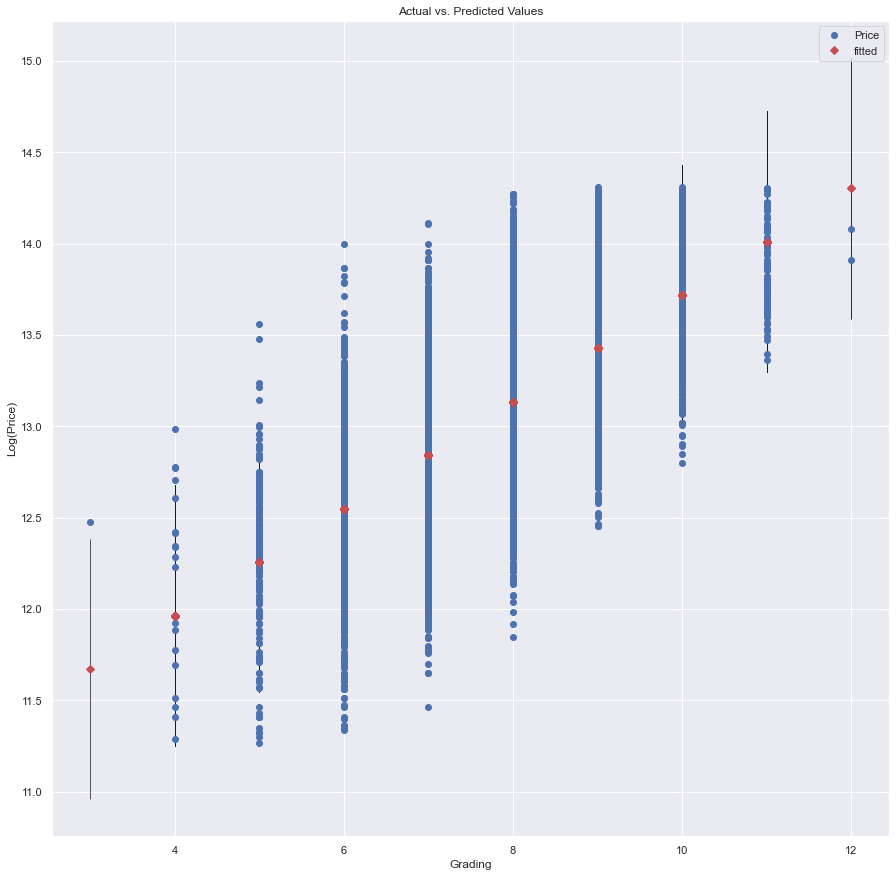

In [61]:
# Plotting actual vs. predicted values
sm.graphics.plot_fit(model, "Grading")
plt.title("Actual vs. Predicted Values")
plt.xlabel("Grading")
plt.ylabel("Log(Price)")  # Assuming you are using log-transformed Price
plt.show()

This visualization provides insights into how well the model fits the training data and how the predicted values compare to the actual target values.
Our model indicates a good fit between the predicted values and the actual values because the fitted line closely follows the diagonal (a 45-degree line from the bottom-left to the top-right of the plot).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


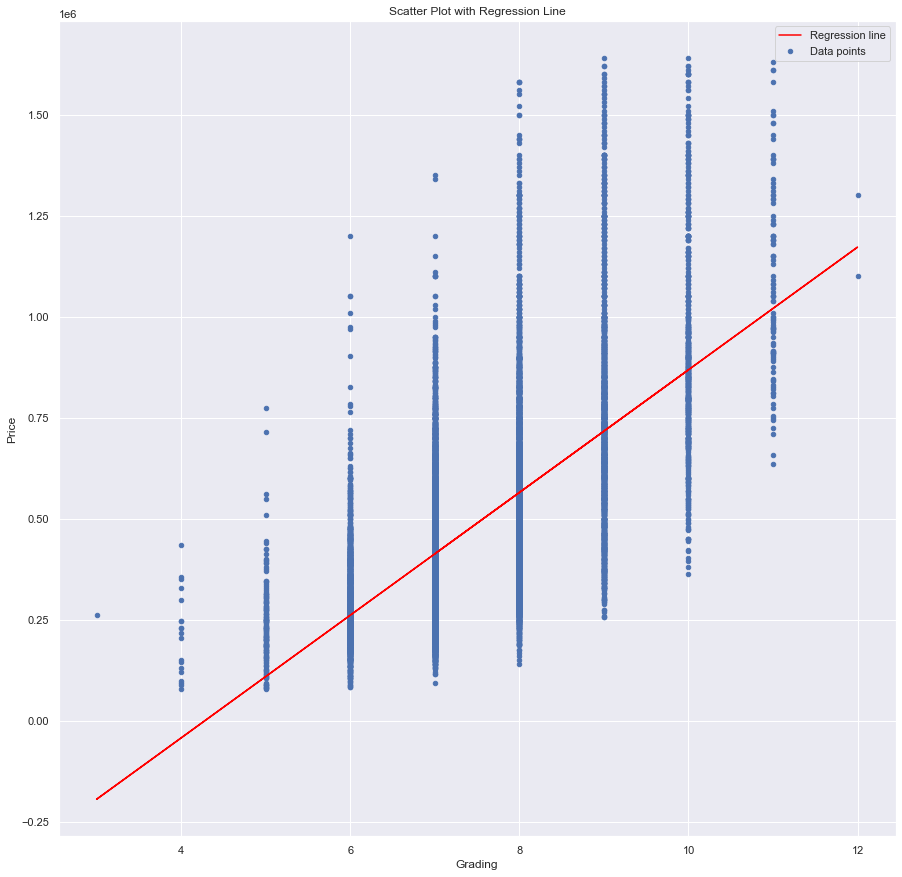

In [62]:
# Define predictor (X) and target (y) variables
X = data2_train['Grading']
y = data2_train['Price']

# Add constant to predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Retrieve the model parameters (coefficients)
intercept, slope = model.params['const'], model.params['Grading']

# Create scatter plot of data points and regression line
fig, ax = plt.subplots()
data2_train.plot.scatter(x='Grading', y='Price', label="Data points", ax=ax)

# Plot the regression line using model parameters
ax.plot(X['Grading'], intercept + slope * X['Grading'], color='red', label="Regression line")

# Add labels, title, and legend
ax.set_xlabel("Grading")
ax.set_ylabel("Price")
ax.set_title("Scatter Plot with Regression Line")
ax.legend()

# Show the plot
plt.show()
                         

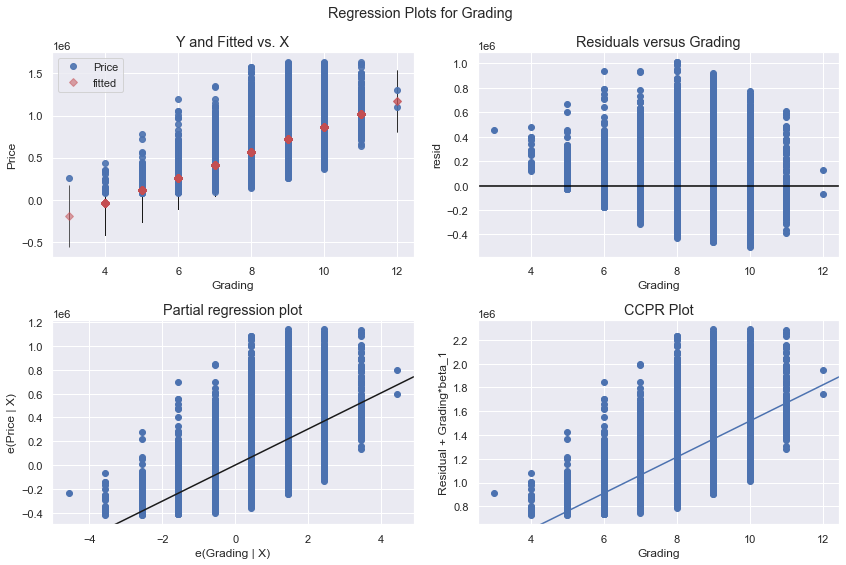

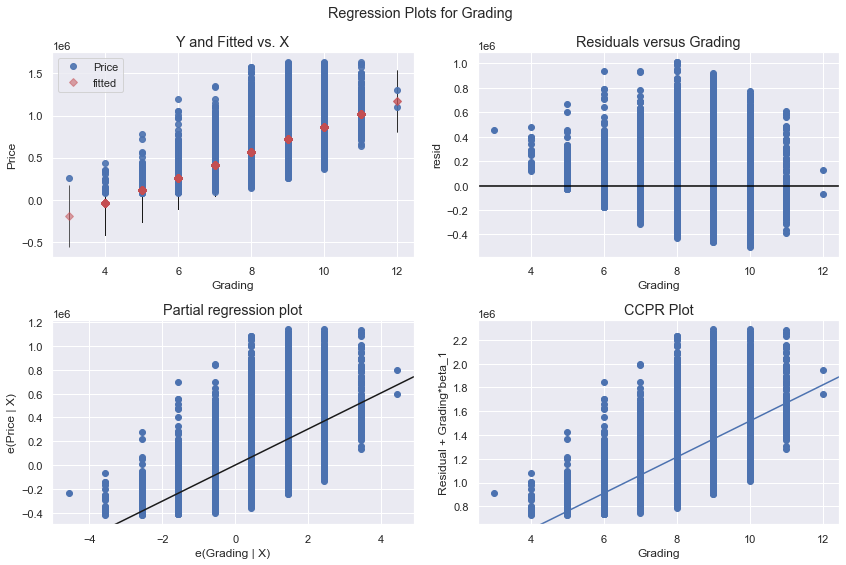

In [63]:
#checking residual in model0
sm.graphics.plot_regress_exog(model, "Grading", fig=plt.figure(figsize=(12,8)))

This function displays a set of diagnostic plots that help in assessing the model's assumptions and the relationship between the predictor variable and the target variable

In [64]:
import numpy as np
import statsmodels.api as sm

# Assuming you have predictor variable(s) in X_baseline and log-transformed target variable in y
# Add a constant term to the predictor variable
X_baseline = sm.add_constant(X_baseline)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X_baseline).fit()

# Calculate the residuals
residuals = y - model.predict(X_baseline)

# Calculate the Root Mean Squared Error (RMSE)
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 190283.19633348894


<strong>MULTI LINEAR REGRESSION

Adding more predictors to our baseline  model can enhance its predictive power by capturing additional complexity and potential relationships within our data. This can lead to improved model accuracy and potentially reducing bias by considering more factors in the prediction process.

In [65]:
data2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19685 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19685 non-null  datetime64[ns]
 1   Price          19685 non-null  float64       
 2   Bedrooms       19685 non-null  int64         
 3   Bathrooms      19685 non-null  float64       
 4   Sqft_living    19685 non-null  int64         
 5   Sqft_lot       19685 non-null  int64         
 6   Floors         19685 non-null  int32         
 7   Waterfront     19685 non-null  object        
 8   View           19685 non-null  object        
 9   Condition      19685 non-null  object        
 10  Grade          19685 non-null  object        
 11  Sqft_basement  19685 non-null  float64       
 12  Yr_built       19685 non-null  int64         
 13  Yr_renovated   19685 non-null  int32         
 14  Zipcode        19685 non-null  int64         
 15  Lat            1968

In [66]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have multiple predictor variables in X_data
X_data = data2_train[['Grading', 'Yr_renovated', 'Sqft_living15','Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot', 'Floors', 'Sqft_basement', 'Yr_renovated','Zipcode', 'Lat', 'Long']]  # Add other predictor variables as needed
y = np.log(data2_train["Price"])  # Log-transformed target variable

# Add a constant term to the predictor variables
X_data = sm.add_constant(X_data)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X_data).fit()

# Predict the y values
y_pred = model.predict(X_data)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2516.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:52:00   Log-Likelihood:                -1344.6
No. Observations:               13779   AIC:                             2715.
Df Residuals:                   13766   BIC:                             2813.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -66.2959      4.484    -14.784

The model explains 69% of the variance in price as indicated by R squared 

Therefore the multiple linear regression is better than our baseline regression

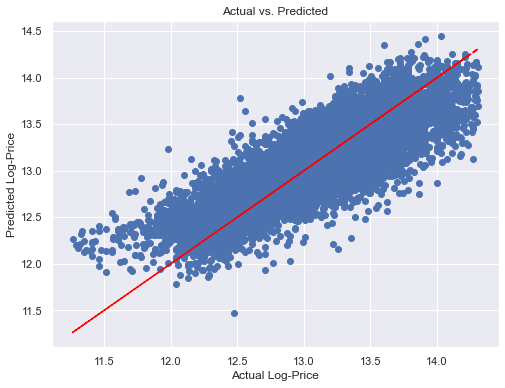

In [67]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot(y, y, color='red', linestyle='--')  # Plotting the perfect fit line
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Log-Price')
plt.ylabel('Predicted Log-Price')
plt.show()


In [68]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 0.26677262566696935


### POLYNOMIAL REGRESSION

The independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. It extends linear regression by allowing the relationship between variables to be modeled as a curve rather than a straight line. In thic case we use  it to determine whether its a better fit compared to the multiple linear regression

In [69]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

poly= PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted1 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted1))
print("Polynomial RMSE: ",poly_reg_rmse) 
r_squared = r2_score(y_test, poly_reg_y_predicted1)
print("R_squared: ", r_squared)

Polynomial RMSE:  0.23061464155657954
R_squared:  0.7655416890894274


Given that polynomial regression accounts for roughly 76% of the volatility in house prices—a percentage somewhat greater 
than that explained by multiple linear regression—it is clear that polynomial regression is a superior model in this particular
situation. Polynomial regression also has a less Root Squared Mean Error than Multiple Linear Regression Model.This suggests 
that the polynomial regression yielded superior results.
The RMSE of the polynomial regression also suggests the same since it is also lower than the multiple linear regression model.

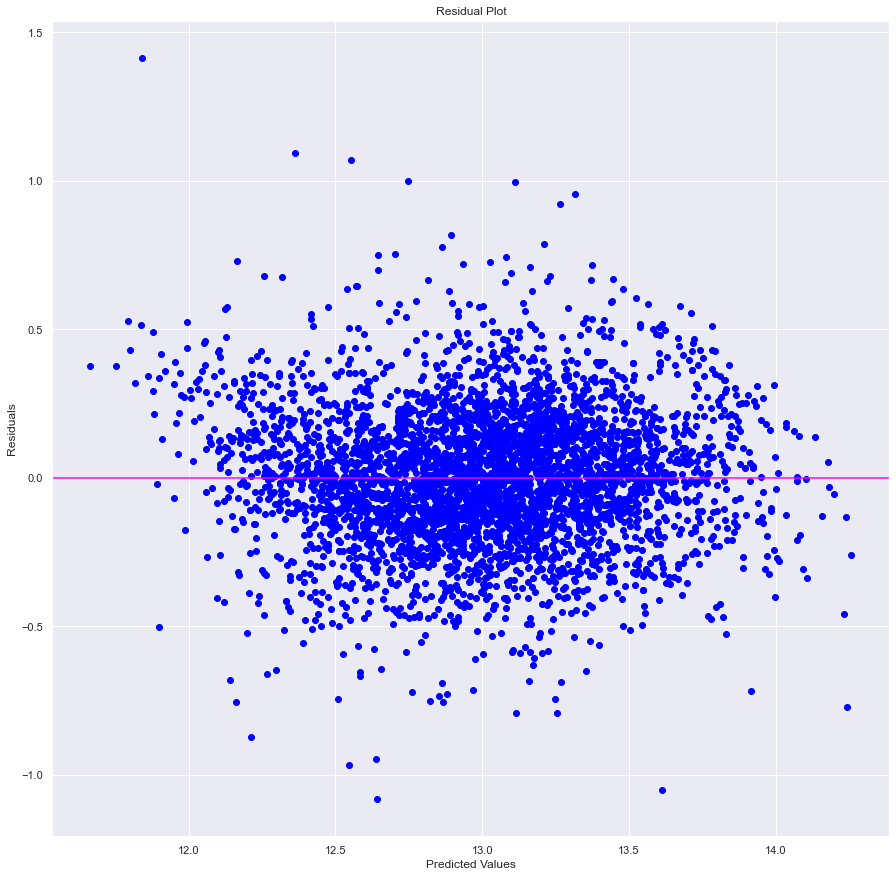

In [70]:
residuals = y_test - poly_reg_y_predicted1

# Plotting the residuals
plt.scatter(poly_reg_y_predicted1, residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='magenta', linestyle='-')  # Adding a horizontal line at y=0
plt.show()

<strong> ANOVA ANALYSIS

Ho: There is no statistically significant interaction effect between sqft_living and grading on the price of a house

H1: There is a statistically significant interaction effect between sqft_living and grading on the price of a house. 

In [71]:
data2.columns

Index(['Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot',
       'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_basement',
       'Yr_built', 'Yr_renovated', 'Zipcode', 'Lat', 'Long', 'Sqft_living15',
       'Seasons', 'Grading'],
      dtype='object')

ANOVA Test: Price vs. Interaction of Sqft_living and Grading
To what extent does the combined influence of grading and sqft_living affect the price of a house?

In [74]:
#Creating interaction term
# Statistical modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols

data2['Sqft_Grading'] = data2['Grading'] * data2['Sqft_living']
formula = 'Price ~ Sqft_living + Grading'
anova_model = ols(formula, data=data2).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                   sum_sq       df           F  PR(>F)
Sqft_living  7.595825e+13      1.0  2327.57958     0.0
Grading      8.849776e+13      1.0  2711.82653     0.0
Residual     6.423025e+14  19682.0         NaN     NaN


At 0.05 significance level, we reject the Null hypothesis and conclude that there is a statistically significant interaction effect between grading and Sqft_living of a house on Price.

<strong>Summary

We ebarked on a iterative statistical modelling proccess where we started with a simple linear regression, multilinear regression modelling and finally Polynomial regression where we noted that for each regression, the model became better with each iteration. 
1. The baseline model had an R Squared of 0.42 
2. The multilinear regression had an R squared of 0.69 and an RMSE of 0.27
3. The polynomial regression model had an Rsquared of 0.77 and an RMSE of 0.23

For the final polynomial regression RMSE  value , our model is off by 0.23 dollars in a given prediction

We also conducted an Anova test to test the significance of how various sets of variables(including categorical variables) affected price. we concluded at at a significance level of 0.05,we reject the Null hypothesis and conclude that there is a statistically significant interaction effect between grading and Sqft_living of a house on Price. 